<a href="https://colab.research.google.com/github/TanChen168/Week7_ClassificationModels/blob/main/ConfusionMatrixExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('/content/sample_data/cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
# Check classes balance
df['diagnosis'].value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [4]:
# Convert target to numerical values
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

# Create test-train-split
y = df['diagnosis']
X = df.drop(columns = 'diagnosis')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
# Instantiate model
dec_tree = DecisionTreeClassifier(random_state = 42)

In [6]:
# Training the model
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
# Run predictions
dec_tree.predict(X_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


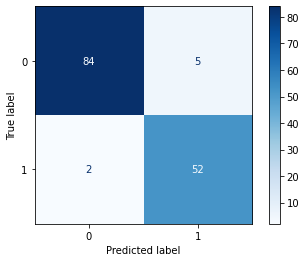

In [8]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dec_tree, X_test, y_test, cmap = 'Blues');

In [16]:
# calculate classification accuracy
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.951048951048951


In [12]:
# Instantiate scaler 
scaler = StandardScaler() 
# Make an instance of a model 
logreg = LogisticRegression()
# Put scaler and model in a pipeline 
logreg_pipe = make_pipeline(scaler, logreg) 
# Train the model on the data 
logreg_pipe.fit(X_train, y_train); 
# class predictions (not predicted probabilities) 
predictions = logreg_pipe.predict(X_test)

In [13]:
score = logreg.score(X_test, y_test)
print(score)

0.3776223776223776


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [15]:
dec_tree.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(random_state=42)>

In [17]:
cm = metrics.confusion_matrix(y_test.values, predictions)
cm

array([[87,  2],
       [ 1, 53]])

In [18]:
# flatten array
cm.ravel()

array([87,  2,  1, 53])

In [22]:
# unpacking
tn, fp, fn, tp = cm.ravel()
print('TN: ', tn)
print('TP: ', tp)
print('FN: ', fn)
print('FP: ', fp)


TN:  87
TP:  53
FN:  1
FP:  2


1) What was the accuracy of the model? (You should have already determined this for the classification tree exercise)

Train set = 1
Test set = 0.95



2) Which condition (Malignant or Benign) is considered the positive class in this data set? - Benign

3) How many false positives were there? - 5

4) How many false negatives were there? - 84

5) For the breast cancer data set, which do you think is more problematic: false positives or false negatives? Explain.  

False Negatives - because they can be potential True Positive cases that should be taking into considerations for treatments and the number is high at 84. While False Postive count is only 5. 